<a href="https://colab.research.google.com/github/prajaktacodes/SparksGRIPInternship/blob/main/Task-1.Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME : Prajakta Mayekar


---



**GRIP OCTOBER 2023 :- The Spark Foundations**

**Task 1 : Prediction using Supervised ML**

Predict the percentage of an student based on the no. of study hours



In [ ]:
#importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Reading the Data
df = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


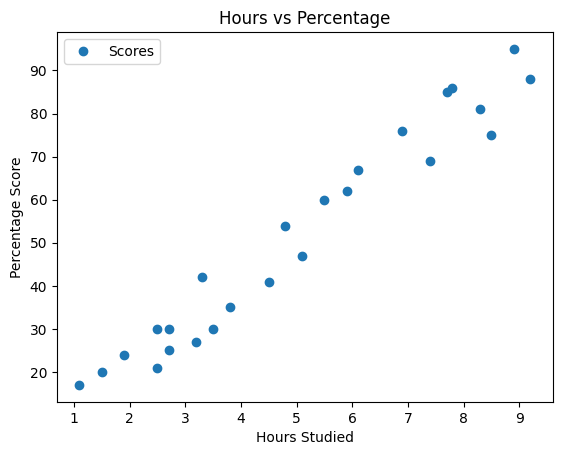

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**



---

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [ ]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")


Training complete.


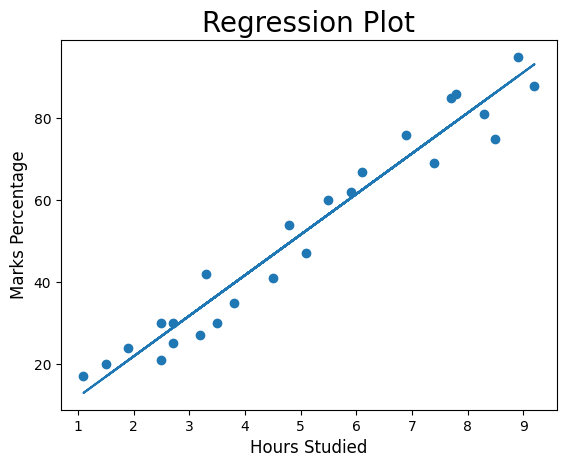

In [ ]:

# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
print(df.corr())


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


**Training the model.**

In [ ]:
#Splitting the Data
# Defining X and y from the Data
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [ ]:

#Fitting the Data into the model
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")


Model Trained


In [ ]:

#Predicting the Percentage of Marks
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [ ]:
#Comparing the Predicted Marks with the Actual Marks
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


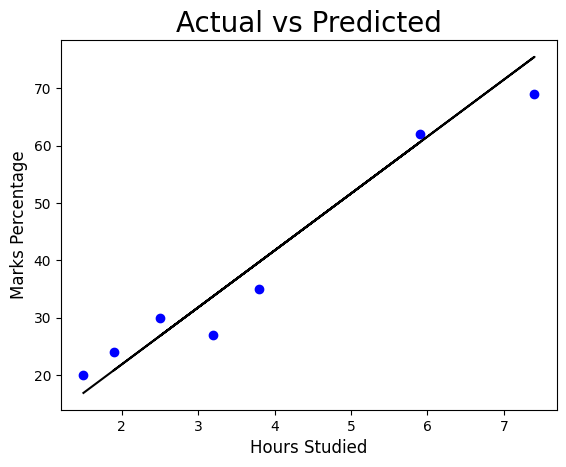

In [ ]:

#Visually Comparing the Predicted Marks with the Actual Marks
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [ ]:

#Evaluating the Model
#Calculating the accuracy of the model
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(val_y,pred_y))

Mean Absolute Error: 4.130879918502482


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [ ]:

hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day then student is likely to score 93.89 marks.**